In [29]:
from osgeo import gdal 
import numpy as np
import matplotlib.pyplot as plt
import fiona as fn
import cartopy.crs as ccrs
from osgeo import ogr
import geopandas as gpd

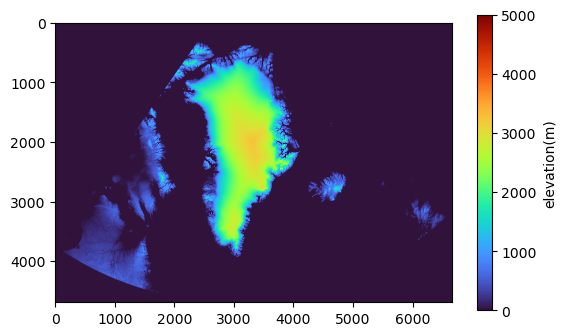

In [22]:
## Opent the raster dataset
data = gdal.Open('ETOPO_2022_v1_60s_greenland_surface.tif')

## Data reprojected
data_Reprj = gdal.Warp("Reprj.tif", data, dstSRS = "EPSG:3413")
data_Reprj_array = data_Reprj.GetRasterBand(1).ReadAsArray()

## Plot the figure
plt.Figure(figsize=(10,10))
plt.imshow(data_Reprj_array,vmin=0, vmax=5000,cmap = 'turbo')
cbar = plt.colorbar(label='elevation(m)',shrink=0.8)

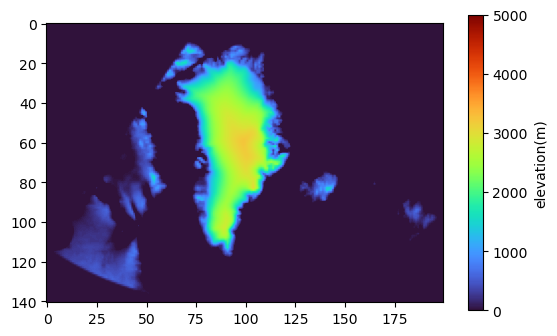

In [24]:
## Data resampled
data_Resampled = gdal.Warp("demRes.tif", data_Reprj, xRes = 25000, yRes = 25000, 
                  resampleAlg = "bilinear")

## read the data as array
data_Resampled_array = data_Resampled.GetRasterBand(1).ReadAsArray()

## Plot the figure
plt.Figure(figsize=(10,10))
plt.imshow(data_Resampled_array,vmin=0, vmax=5000,cmap = 'turbo')
cbar = plt.colorbar(label='elevation(m)',shrink=0.8)

In [66]:
data_Resampled

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f4152a015c0> >

In [54]:
import os
os.getcwdb()
os.chdir('/home/jovyan/shared-public/QGreenland-Researcher-Workshop/group-one/example data/Greenland Shapefile')
os.getcwdb()

b'/home/jovyan/shared-public/QGreenland-Researcher-Workshop/group-one/example data/Greenland Shapefile'

In [55]:
import geopandas as gpd

path = '/home/jovyan/shared-public/QGreenland-Researcher-Workshop/group-one/example data/Greenland Shapefile'
file_in = "sd368wz2435.shp"
file_out = "reprojected.shp"

# Read the shapefile
shapefile = gpd.read_file(file_in)

# Change CRS to EPSG 4326
shapefile = data.to_crs("EPSG:4326")

# Write the reprojected shapefile
shapefile.to_file(path + file_out)


In [63]:
## Open the Vector dataset
shapefile = ogr.Open("reprojected.shp", 1)

## Clipping the dataset using the shapefile
data_clip = gdal.Warp("demClip.tif", data_Resampled, cutlineDSName = shapefile,
                   cropToCutline = True, dstNodata = np.nan)

data_Clip_array = data_clip.GetRasterBand(1).ReadAsArray()

ERROR 1: Cannot open <osgeo.ogr.DataSource; proxy of <Swig Object of type 'OGRDataSourceShadow *' at 0x7f41620de7f0> >.


AttributeError: 'NoneType' object has no attribute 'GetRasterBand'

In [70]:
data_clip is None

True

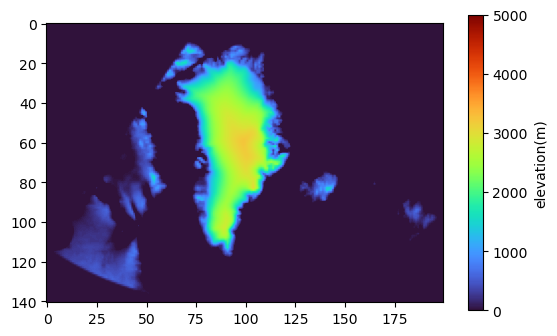

In [64]:
## Plot the figure
plt.Figure(figsize=(10,10))
plt.imshow(data_Clip_array,vmin=0, vmax=5000,cmap = 'turbo')
cbar = plt.colorbar(label='elevation(m)',shrink=0.8)